In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/data/labelled_training_dataa.csv')
val_data = pd.read_csv('/content/drive/MyDrive/data/labelled_validation_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/data/labelled_testing_data.csv')

In [ ]:
train_data.head(2)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0


In [ ]:
train_data.describe(include=['object', 'float', 'int'])

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
count,952111.000000,952111.000000,952111.00000,952111.000000,952111.000000,9.521110e+05,952111,952111,952111.000000,952111,952111,952111.000000,952111.000000,952111,952111.000000,952111.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,256,9,NaN,46,101244,NaN,NaN,249522,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,ps,ubuntu,NaN,close,[],NaN,NaN,"[{'name': 'fd', 'type': 'int', 'value': 9}]",NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,413085,190500,NaN,228921,702553,NaN,NaN,109572,NaN,NaN
mean,1568.803863,6920.476013,6924.95680,2881.992893,171.381338,4.026532e+09,NaN,NaN,248.592298,NaN,NaN,2.716239,0.833845,NaN,0.181416,0.166401
std,1159.066288,1825.897760,1815.41417,2956.936787,376.108045,1.527380e+02,NaN,NaN,364.790424,NaN,NaN,1.236872,330.971366,NaN,0.385363,0.372440
min,129.050634,1.000000,1.00000,0.000000,0.000000,4.026532e+09,NaN,NaN,2.000000,NaN,NaN,0.000000,-115.000000,NaN,0.000000,0.000000
25%,479.114390,7321.000000,7321.00000,188.000000,0.000000,4.026532e+09,NaN,NaN,4.000000,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000
50%,1267.946547,7379.000000,7379.00000,1469.000000,0.000000,4.026532e+09,NaN,NaN,42.000000,NaN,NaN,3.000000,0.000000,NaN,0.000000,0.000000
75%,2639.122878,7505.000000,7505.00000,7099.000000,0.000000,4.026532e+09,NaN,NaN,257.000000,NaN,NaN,4.000000,0.000000,NaN,0.000000,0.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def label_encode_replace_columns(data, columns, label_encoders=None):
    if label_encoders is None:
        label_encoders = {}
    for column in columns:
        if column not in label_encoders:
            label_encoders[column] = LabelEncoder()
            # Combine all datasets to ensure all labels are observed
            all_data = pd.concat([train_data[column], test_data[column], val_data[column]])
            label_encoders[column].fit(all_data.astype(str))
        encoded_column = label_encoders[column].transform(data[column].astype(str))
        data[column] = encoded_column
    return data, label_encoders

# Combine all datasets
combined_data = pd.concat([train_data, test_data, val_data])

combined_data_encoded, label_encoders = label_encode_replace_columns(combined_data, ['processName', 'eventName'])

# Apply label encoding to individual datasets
train_data_encoded = combined_data_encoded[:len(train_data)]
test_data_encoded = combined_data_encoded[len(train_data):len(train_data) + len(test_data)]
val_data_encoded = combined_data_encoded[len(train_data) + len(test_data):]

# Print the label encoders to see the mapping
print(label_encoders)


{'processName': LabelEncoder(), 'eventName': LabelEncoder()}


In [ ]:
# Print the mapping of numerical labels to original categorical values
for column, encoder in label_encoders.items():
    print(f"Mapping for {column}:")
    for label, value in enumerate(encoder.classes_):
        print(f"Numerical label {label} corresponds to '{value}'")
    print()


Mapping for processName:
Numerical label 0 corresponds to '(activate)'
Numerical label 1 corresponds to '(direxec)'
Numerical label 2 corresponds to '(sd-executor)'
Numerical label 3 corresponds to '(sd-pam)'
Numerical label 4 corresponds to '(sd-sync)'
Numerical label 5 corresponds to '(systemd)'
Numerical label 6 corresponds to '(time-dir)'
Numerical label 7 corresponds to '(tmpfiles)'
Numerical label 8 corresponds to '(ystemctl)'
Numerical label 9 corresponds to '00-header'
Numerical label 10 corresponds to '10-help-text'
Numerical label 11 corresponds to '30-systemd-envi'
Numerical label 12 corresponds to '50-landscape-sy'
Numerical label 13 corresponds to '50-motd-news'
Numerical label 14 corresponds to '85-fwupd'
Numerical label 15 corresponds to '90-updates-avai'
Numerical label 16 corresponds to '91-release-upgr'
Numerical label 17 corresponds to '92-unattended-u'
Numerical label 18 corresponds to '95-hwe-eol'
Numerical label 19 corresponds to '97-overlayroot'
Numerical label 2

In [ ]:
# Print the mapping of numerical labels to original categorical values
for column, encoder in loaded_label_encoders.items():
    print(f"Mapping for {column}:")
    for label, value in enumerate(encoder.classes_):
        print(f"Numerical label {label} corresponds to '{value}'")
    print()


Mapping for processName:
Numerical label 0 corresponds to '(activate)'
Numerical label 1 corresponds to '(direxec)'
Numerical label 2 corresponds to '(sd-executor)'
Numerical label 3 corresponds to '(sd-pam)'
Numerical label 4 corresponds to '(sd-sync)'
Numerical label 5 corresponds to '(systemd)'
Numerical label 6 corresponds to '(time-dir)'
Numerical label 7 corresponds to '(tmpfiles)'
Numerical label 8 corresponds to '(ystemctl)'
Numerical label 9 corresponds to '00-header'
Numerical label 10 corresponds to '10-help-text'
Numerical label 11 corresponds to '30-systemd-envi'
Numerical label 12 corresponds to '50-landscape-sy'
Numerical label 13 corresponds to '50-motd-news'
Numerical label 14 corresponds to '85-fwupd'
Numerical label 15 corresponds to '90-updates-avai'
Numerical label 16 corresponds to '91-release-upgr'
Numerical label 17 corresponds to '92-unattended-u'
Numerical label 18 corresponds to '95-hwe-eol'
Numerical label 19 corresponds to '97-overlayroot'
Numerical label 2

In [ ]:
unique_process_names = train_data['processName'].unique()
print(unique_process_names)

['close' 'sh' 'run-parts' 'atd' 'systemd-logind' 'systemd'
 'systemd-journal' 'dbus-daemon' '(time-dir)' 'systemd-user-ru' 'docker'
 'systemd-resolve' 'dockerd' 'containerd-shim' 'amazon-ssm-agen' 'ps'
 'cron' 'snapd' 'systemd-network' 'journal-offline' 'kworker/dying'
 'ssm-agent-worke' 'packagekitd' 'gdbus' 'gmain' '(tmpfiles)'
 'systemd-tmpfile' 'kworker/u30:1' 'poweroff' '(sd-sync)' 'kworker/u30:0'
 'kworker/u30:2' 'systemd-timesyn' 'systemd-udevd' '(sd-pam)' 'sshd'
 '(systemd)' '(sd-executor)' '(direxec)' '30-systemd-envi' '(ystemctl)'
 'systemctl' 'env' '00-header' 'uname' '10-help-text' '50-landscape-sy'
 'grep' 'bc' 'cut' 'date' 'landscape-sysin' 'who' '50-motd-news' 'cat'
 'head' 'tr' '85-fwupd' '90-updates-avai' 'find' '91-release-upgr'
 'lsb_release' 'id' 'release-upgrade' 'stat' 'expr' '92-unattended-u'
 'update-motd-una' '95-hwe-eol' 'update-motd-hwe' 'systemd-detect-'
 'apt-config' 'dpkg' 'dirname' 'mktemp' 'hwe-support-sta' 'mv' 'rm'
 '97-overlayroot' 'egrep' 'sort' '98-

In [ ]:
unique_process_names = train_data['eventName'].unique()
print(unique_process_names)

['prctl' 'close' 'sched_process_exit' 'access' 'security_file_open'
 'openat' 'fstat' 'stat' 'clone' 'execve' 'security_bprm_check'
 'getdents64' 'cap_capable' 'kill' 'lstat' 'fchmod'
 'security_inode_unlink' 'unlink' 'dup3' 'socket' 'connect' 'dup2'
 'accept4' 'unlinkat' 'umount' 'getsockname' 'symlink' 'bind' 'setgid'
 'setuid' 'accept' 'dup' 'setregid' 'setreuid' 'mount' 'lchown' 'mknod'
 'fchownat' 'chmod' 'bpf' 'memfd_create' 'listen' 'faccessat' 'setfsgid'
 'setfsuid' 'open']


In [ ]:
train_data.head(2)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0


In [ ]:
val_data.head(2)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,124.439221,381,381,1,101,4026532232,systemd-resolve,ip-10-100-1-129,41,socket,"[139913106282763, 139913103116537, 94901962555...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,124.439751,378,378,1,100,4026532231,systemd-network,ip-10-100-1-129,41,socket,"[140343254628619, 93967981149065, 93967990898192]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0


In [ ]:
test_data.head(2)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0


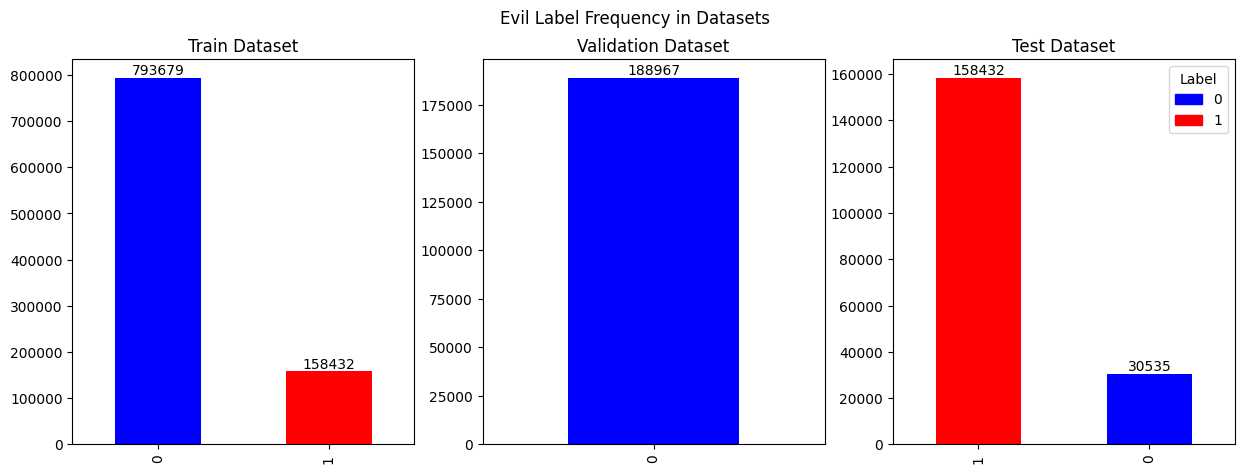

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for train_data
train_counts = train_data.evil.value_counts()
train_colors = ['blue', 'red']  # Assign blue to 0 and red to 1
train_counts.plot(kind='bar', title='Train Dataset', ax=axes[0], color=train_colors)
for i, count in enumerate(train_counts):
    axes[0].text(i, count, str(count), ha='center', va='bottom')

# Plot for val_data
val_counts = val_data.evil.value_counts()
val_colors = ['blue', 'red']
val_counts.plot(kind='bar', title='Validation Dataset', ax=axes[1], color=val_colors)
for i, count in enumerate(val_counts):
    axes[1].text(i, count, str(count), ha='center', va='bottom')

# Plot for test_data
test_counts = test_data.evil.value_counts()
test_colors = ['red','blue']  # Assign blue to 0 and red to 1
test_counts.plot(kind='bar', title='Test Dataset', ax=axes[2], color=test_colors)
for i, count in enumerate(test_counts):
    axes[2].text(i, count, str(count), ha='center', va='bottom')

# Set overall title
plt.suptitle('Evil Label Frequency in Datasets')

# Add custom legend for colors
blue_patch = mpatches.Patch(color='blue', label='0')
red_patch = mpatches.Patch(color='red', label='1')
plt.legend(handles=[blue_patch, red_patch], title='Label', loc='upper right')

# Show plots
plt.show()


<ipython-input-10-4c9032399d6e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


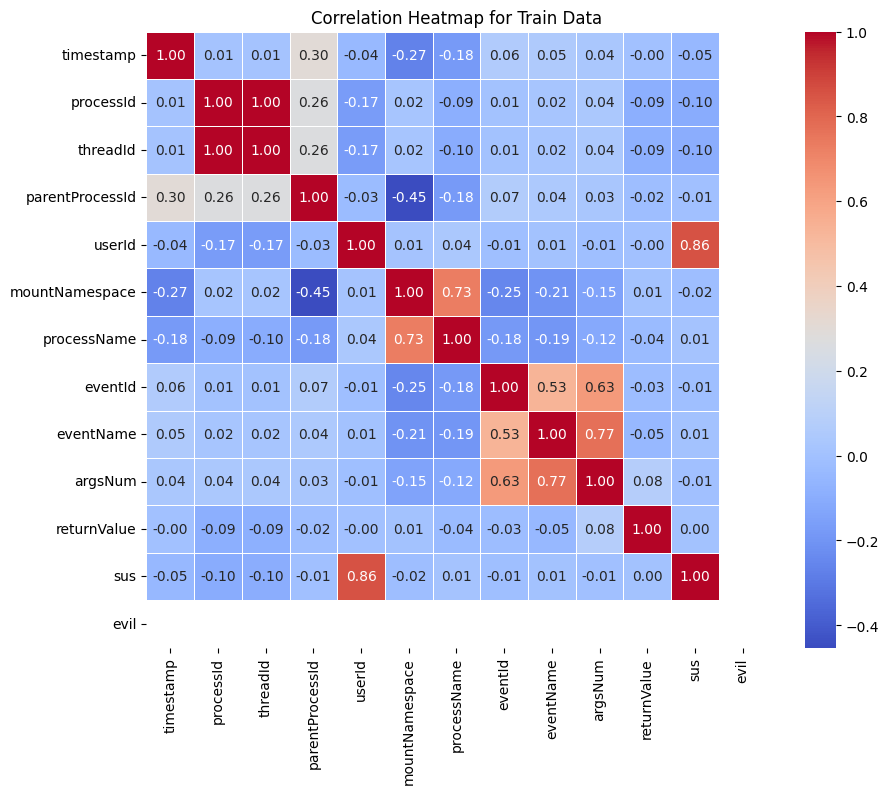

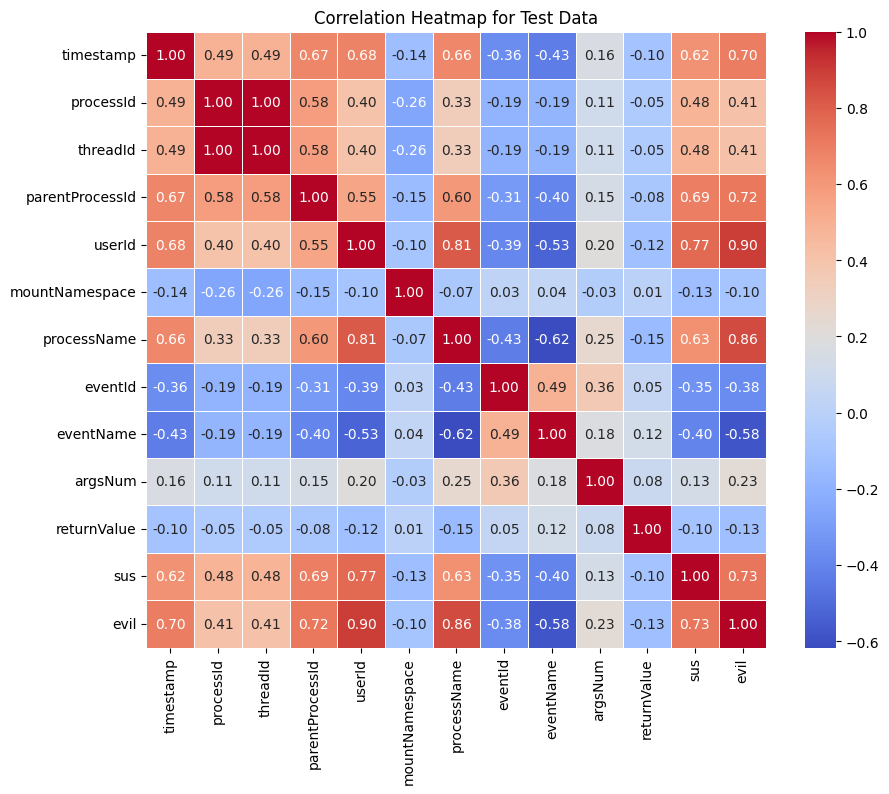

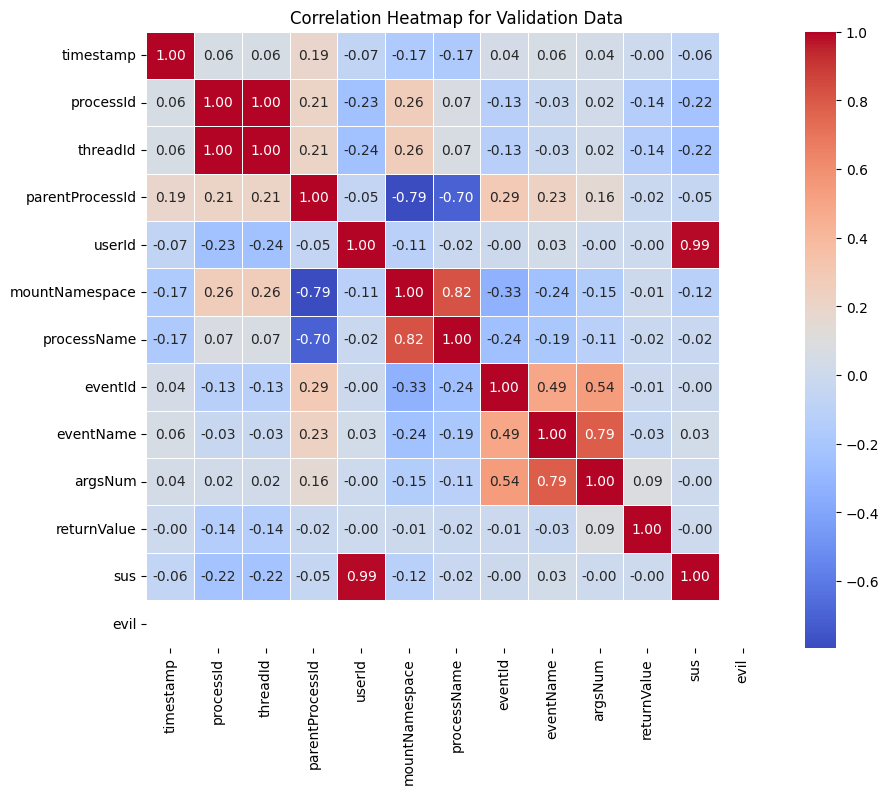

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot correlation heatmap
def plot_correlation_heatmap(data, title):
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap for {title}')
    plt.show()


plot_correlation_heatmap(train_data_encoded, 'Train Data')

plot_correlation_heatmap(test_data_encoded, 'Test Data')

plot_correlation_heatmap(val_data_encoded, 'Validation Data')


In [ ]:
class Iso_Forest:
    def __init__(self, path):
        data = pd.read_csv(path)

        # Remove the problematic row (275968) before preprocessing
        data = data.drop(index=275968, errors='ignore')

        # Preprocessing
        labels = pd.DataFrame(data[["sus", "evil"]])
        data = pd.DataFrame(data[["processId", "parentProcessId", "userId","mountNamespace", "processName", "eventId", "eventName", "argsNum", "returnValue"]])

        # Map features
        data["processId"] = data["processId"].map(lambda x: 0 if x in [0, 1, 2] else 1)
        data["parentProcessId"] = data["parentProcessId"].map(lambda x: 0 if x in [0, 1, 2] else 1)
        data["userId"] = data["userId"].map(lambda x: 0 if x < 1000 else 1)
        data["mountNamespace"] = data["mountNamespace"].map(lambda x: 0 if x == 4026531840 else 1)
        data["returnValue"] = data["returnValue"].map(lambda x: 0 if x == 0 else (1 if x > 0 else 2))

        # Apply label encoding
        columns_to_encode = ["processName", "eventName"]
        data, _ = label_encode_replace_columns(data, columns_to_encode)  # Unpack the tuple

        # Set column names after label encoding
        data.columns = ["processId", "parentProcessId", "userId","mountNamespace", "processName", "eventId", "eventName", "argsNum", "returnValue"]

        self.X = data
        self.y = labels["evil"]


In [ ]:
# instance of training
train_dataset = Iso_Forest('/content/drive/MyDrive/data/labelled_training_data.csv')

# instance of validation
val_dataset = Iso_Forest('/content/drive/MyDrive/data/labelled_validation_data.csv')

# instance of test
test_dataset = Iso_Forest('/content/drive/MyDrive/data/labelled_testing_data.csv')

# Print X and y for training dataset
print("Training Dataset:")
print("X:")
print(train_dataset.X.head(1))
print("\ny:")
print(train_dataset.y.head(1))
print("-----------------------------------")
# Print X and y for validation dataset
print("\nValidation Dataset:")
print("X:")
print(val_dataset.X.head(1))
print("\ny:")
print(val_dataset.y.head(1))
print("-----------------------------------")
# Print X and y for test dataset
print("\ntest Dataset:")
print("X:")
print(test_dataset.X.head(1))
print("\ny:")
print(test_dataset.y.head(1))

Training Dataset:
X:
   processId  parentProcessId  userId  mountNamespace  processName  eventId  \
0          1                0       0               1           32      157   

   eventName  argsNum  returnValue  
0         29        5            0  

y:
0    0
Name: evil, dtype: int64
-----------------------------------

Validation Dataset:
X:
   processId  parentProcessId  userId  mountNamespace  processName  eventId  \
0          1                0       0               1           91       41   

   eventName  argsNum  returnValue  
0         40        3            1  

y:
0    0
Name: evil, dtype: int64
-----------------------------------

test Dataset:
X:
   processId  parentProcessId  userId  mountNamespace  processName  eventId  \
0          1                0       0               1           91       41   

   eventName  argsNum  returnValue  
0         40        3            1  

y:
0    0
Name: evil, dtype: int64



Shapes before train-test split:
X_train: (952110, 9)
y_train: (952110,)
X_val: (188967, 9)
y_val: (188967,)

Validation Report:
              precision    recall  f1-score   support

           0       1.00      0.21      0.35    188967
           1       0.00      1.00      0.00         0

    accuracy                           0.21    188967
   macro avg       0.50      0.60      0.17    188967
weighted avg       1.00      0.21      0.35    188967



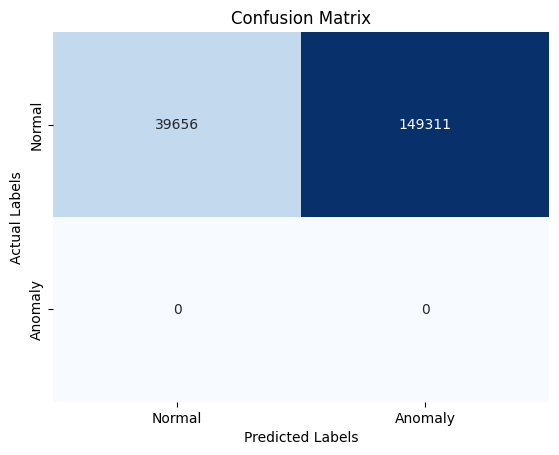

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

def train_validate_isolation_forest(train_dataset, val_dataset, contamination):
    # Print the shapes of X and y to check for consistency
    print("\nShapes before train-test split:")
    print("X_train:", train_dataset.X.shape)
    print("y_train:", train_dataset.y.shape)
    print("X_val:", val_dataset.X.shape)
    print("y_val:", val_dataset.y.shape)

    # Create and train the Isolation Forest model
    model = IsolationForest(contamination=contamination)
    model.fit(train_dataset.X)

    # Save the trained model to a file
    joblib.dump(model, '/content/drive/MyDrive/data/isoforest.pkl')

    # Predict on the validation set
    y_val_pred = model.predict(val_dataset.X)
    mapped = [1 if pred == 1 else 0 for pred in y_val_pred]

    #metric_printer(val_dataset.y, y_val_pred)

    # Evaluate on the validation set
    print("\nValidation Report:")
    print(classification_report(val_dataset.y, mapped, zero_division=1))

    # Create a confusion matrix
    conf_matrix = confusion_matrix(val_dataset.y, mapped)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()


train_validate_isolation_forest(train_dataset, val_dataset, contamination='auto')

In [ ]:
import joblib
model = joblib.load('/content/drive/MyDrive/data/isoforest.pkl')


Test Report:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46     30535
           1       0.89      0.92      0.90    158432

    accuracy                           0.84    188967
   macro avg       0.70      0.67      0.68    188967
weighted avg       0.83      0.84      0.83    188967



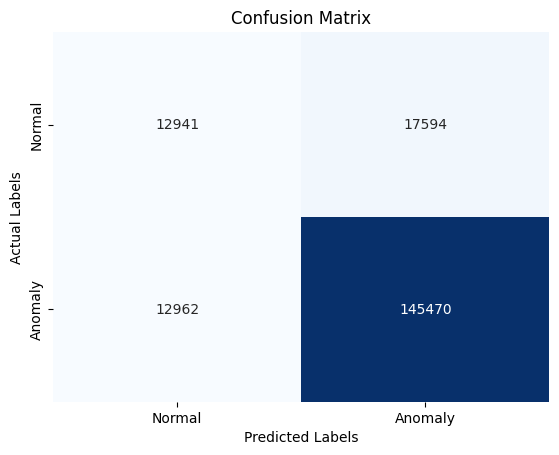

In [ ]:
#test_dataset = Iso_Forest('/content/drive/MyDrive/data/labelled_testing_data.csv')
pred = model.predict(test_dataset.X)
mapped = [1 if pred == 1 else 0 for pred in pred]

# Evaluate on the test set
print("\nTest Report:")
print(classification_report(test_dataset.y, mapped))

# Create a confusion matrix
conf_matrix = confusion_matrix(test_dataset.y, mapped)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib
from sklearn.metrics import roc_auc_score

# Load the model
model = joblib.load('/content/drive/MyDrive/data/isoforest.pkl')

# Get decision function scores
scores = model.decision_function(test_dataset.X)

# Calculate AUROC
auroc = roc_auc_score(test_dataset.y, scores)

print("\nAUROC:", auroc)



AUROC: 0.5101290386081618



Shapes before train-test split:
X_train: (952110, 9)
y_train: (952110,)
X_val: (188967, 9)
y_val: (188967,)

Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    188967
           1       0.00      1.00      0.00         0

    accuracy                           1.00    188967
   macro avg       0.50      1.00      0.50    188967
weighted avg       1.00      1.00      1.00    188967



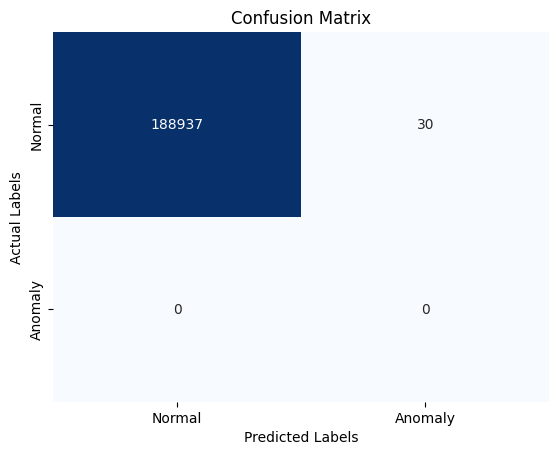

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_validate_random_forest(train_dataset, val_dataset):
    # Print the shapes of X and y to check for consistency
    print("\nShapes before train-test split:")
    print("X_train:", train_dataset.X.shape)
    print("y_train:", train_dataset.y.shape)
    print("X_val:", val_dataset.X.shape)
    print("y_val:", val_dataset.y.shape)

    # Create and train the Random Forest Classifier model
    model = RandomForestClassifier()
    model.fit(train_dataset.X, train_dataset.y)
    # Save the trained model to a file
    joblib.dump(model, '/content/drive/MyDrive/data/ranforest.pkl')


    # Predict on the validation set
    y_val_pred = model.predict(val_dataset.X)


    # Evaluate on the validation set
    print("\nValidation Report:")
    print(classification_report(val_dataset.y, y_val_pred, zero_division=1))


    # Create a confusion matrix
    conf_matrix = confusion_matrix(val_dataset.y, y_val_pred)


    # Plot the confusion matrix as a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

train_validate_random_forest(train_dataset, val_dataset)


In [ ]:
import joblib
model = joblib.load('/content/drive/MyDrive/data/ranforest.pkl')


Test Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30535
           1       1.00      1.00      1.00    158432

    accuracy                           1.00    188967
   macro avg       1.00      1.00      1.00    188967
weighted avg       1.00      1.00      1.00    188967



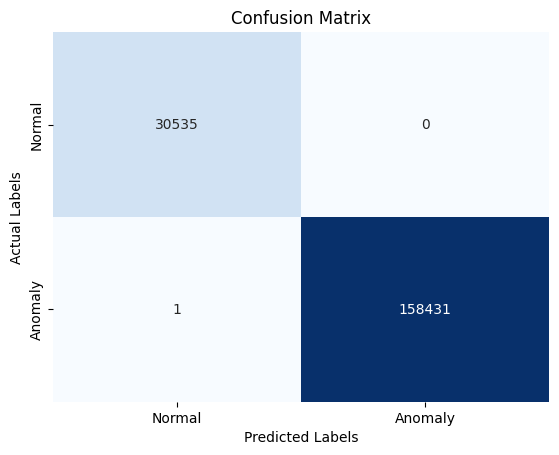

In [ ]:
pred = model.predict(test_dataset.X)

# Evaluate on the test set
print("\nTest Report:")
print(classification_report(test_dataset.y, pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(test_dataset.y, pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib
from sklearn.metrics import roc_auc_score

# Load the model
model = joblib.load('/content/drive/MyDrive/data/ranforest.pkl')

# Get probability estimates for the positive class
probs = model.predict_proba(test_dataset.X)[:, 1]

# Calculate AUROC
auroc = roc_auc_score(test_dataset.y, probs)

print("\nAUROC:", auroc)



AUROC: 0.9999999979329111


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(



validation report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    188967
           1       0.00      1.00      0.00         0

    accuracy                           1.00    188967
   macro avg       0.50      1.00      0.50    188967
weighted avg       1.00      1.00      1.00    188967



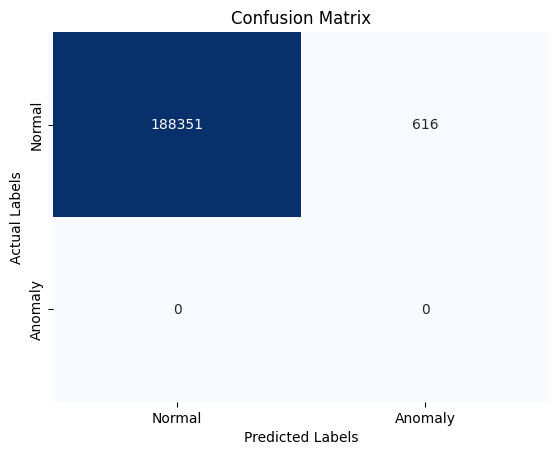

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Train the Local Outlier Factor model
model = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True)  # Adjust parameters as needed
model.fit(train_dataset.X)

# Save the trained model
joblib.dump(model, '/content/drive/MyDrive/data/lof_model_fulltrain.pkl')

# Predict on the validation set
y_pred = model.predict(val_dataset.X)

# Assigning 1 to anomalies and 0 to inliers
mapped = np.where(y_pred == -1, 1, 0)

# Evaluate on the validation set
print("\nvalidation report:")
print(classification_report(val_dataset.y, mapped, zero_division=1))

# Create a confusion matrix
conf_matrix = confusion_matrix(val_dataset.y, mapped)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib
model = joblib.load('/content/drive/MyDrive/data/lof_model_fulltrain.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(



Test Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     30535
           1       0.93      1.00      0.96    158432

    accuracy                           0.94    188967
   macro avg       0.96      0.80      0.86    188967
weighted avg       0.94      0.94      0.93    188967



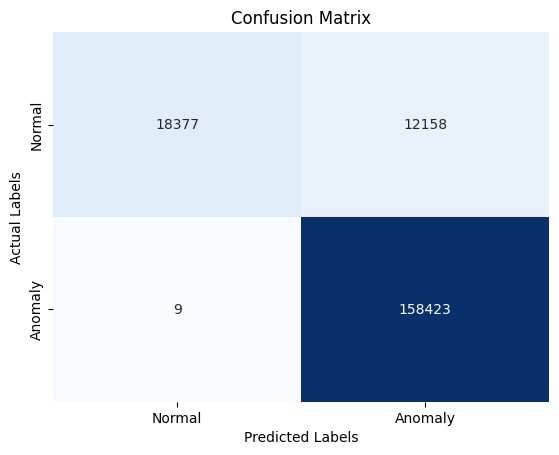

In [ ]:
preds = model.predict(test_dataset.X)

# Assigning 1 to anomalies and 0 to inliers
mapped = np.where(preds == -1, 1, 0)

# Evaluate on the test set
print("\nTest Report:")
print(classification_report(test_dataset.y, mapped))

# Create a confusion matrix
conf_matrix = confusion_matrix(test_dataset.y, mapped)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(



AUROC: 0.8008885771613059


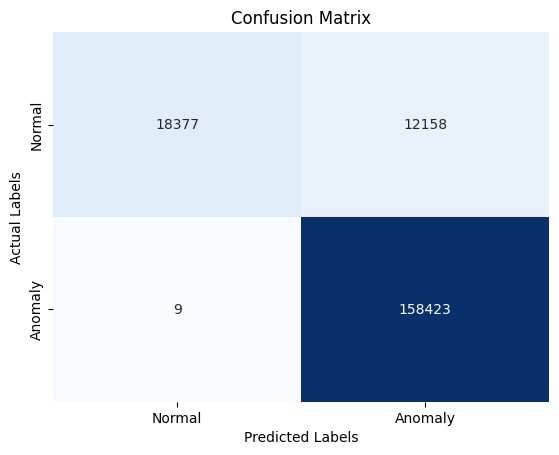

In [ ]:
import joblib
from sklearn.metrics import roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the model
model = joblib.load('/content/drive/MyDrive/data/lof_model_fulltrain.pkl')

# Get predictions from the model
preds = model.predict(test_dataset.X)

# Assigning 1 to anomalies and 0 to inliers
mapped = np.where(preds == -1, 1, 0)

# Calculate AUROC
auroc = roc_auc_score(test_dataset.y, mapped)

print("\nAUROC:", auroc)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_dataset.y, mapped)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
import joblib
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor

def predict(model, synthetic_row):
    data = pd.DataFrame(synthetic_row)

    # Map features
    data["processId"] = data["processId"].map(lambda x: 0 if x in [0, 1, 2] else 1)
    data["parentProcessId"] = data["parentProcessId"].map(lambda x: 0 if x in [0, 1, 2] else 1)
    data["userId"] = data["userId"].map(lambda x: 0 if x < 1000 else 1)
    data["mountNamespace"] = data["mountNamespace"].map(lambda x: 0 if x == 4026531840 else 1)
    data["returnValue"] = data["returnValue"].map(lambda x: 0 if x == 0 else (1 if x > 0 else 2))

    # Load label encoders
    loaded_label_encoders = joblib.load('/content/drive/MyDrive/data/label_encoders.joblib')

    # Transform "processName" and "eventName" using loaded label encoders
    data["processName"] = loaded_label_encoders["processName"].transform(data["processName"])
    data["eventName"] = loaded_label_encoders["eventName"].transform(data["eventName"])

    # Make predictions
    preds = model.predict(data)

    if isinstance(model, (IsolationForest, RandomForestClassifier)): # Check if model is Isolation Forest or Random Forest
        mapped = [1 if pred == 1 else 0 for pred in preds]
    elif isinstance(model, LocalOutlierFactor):
        mapped = np.where(preds == -1, 1, 0)
    else:
        raise ValueError("Unsupported model type")

    if 1 in mapped:
        print(f"Anomaly data")
    else:
        print(f"Normal data")

# Load the models
iso_model = joblib.load('/content/drive/MyDrive/data/isoforest.pkl')
ran_model = joblib.load('/content/drive/MyDrive/data/ranforest.pkl')
lof_model = joblib.load('/content/drive/MyDrive/data/lof_model_fulltrain.pkl')

# Synthetic row
synthetic_row = {
    "processId": [7441],
    "parentProcessId": [7440],
    "userId": [1001],
    "mountNamespace": [4026531840],
    "processName": ["lscpu"],
    "eventId": [1005],
    "eventName": ["security_file_open"],
    "argsNum": [4],
    "returnValue": [0]
}

# Call the predict function for each model
print("Isolation Forest:")
predict(iso_model, synthetic_row)
print("\nRandom Forest:")
predict(ran_model, synthetic_row)
print("\nLocal Outlier Factor:")
predict(lof_model, synthetic_row)


Isolation Forest:
Normal data

Random Forest:
Anomaly data

Local Outlier Factor:
Anomaly data


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
